In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import confusion_matrix
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [368]:
df_socio = pd.read_csv('../data/socio_torcedor.csv')


In [369]:
df_socio.head()

,_id,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,tipo_de_plano,quantos_membros,planos_com_ingresso_incluso,estado_civil,risco_de_churn,feedback_sobre_servicos,frequencia_de_compra_de_produtos
0,1,39,71,11,4,134,familiar,4,sim,solteiro,medio,3,0
1,2,52,60,1,1,219,familiar,3,sim,divorciado,alto,1,3
2,3,29,20,4,3,435,individual,4,nao,casado,alto,4,5
3,4,15,82,8,1,386,individual,4,sim,solteiro,baixo,2,10
4,5,43,86,3,3,239,individual,1,sim,casado,alto,8,2


In [370]:
df_socio['estado_civil'].unique()

array(['solteiro', 'divorciado', 'casado'], dtype=object)

In [371]:
df_socio.columns

Index(['_id', 'tempo_de_assinatura', 'historico_de_presenca_nos_jogos',
       'historico_de_socio', 'numero_de_desistencias_no_periodo',
       'historico_de_preco_nos_planos', 'tipo_de_plano', 'quantos_membros',
       'planos_com_ingresso_incluso', 'estado_civil', 'risco_de_churn',
       'feedback_sobre_servicos', 'frequencia_de_compra_de_produtos'],
      dtype='object')

In [372]:
df_socio['risco_de_churn'].value_counts()

risco_de_churn
baixo    1690
médio    1655
alto     1653
medio       1
Name: count, dtype: int64

In [373]:
df_socio['risco_de_churn'] = df_socio['risco_de_churn'].replace('medio', 'médio')

In [374]:
df_socio['risco_de_churn'].value_counts()

risco_de_churn
baixo    1690
médio    1656
alto     1653
Name: count, dtype: int64

In [375]:
import seaborn

In [376]:
df_socio.head()

,_id,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,tipo_de_plano,quantos_membros,planos_com_ingresso_incluso,estado_civil,risco_de_churn,feedback_sobre_servicos,frequencia_de_compra_de_produtos
0,1,39,71,11,4,134,familiar,4,sim,solteiro,médio,3,0
1,2,52,60,1,1,219,familiar,3,sim,divorciado,alto,1,3
2,3,29,20,4,3,435,individual,4,nao,casado,alto,4,5
3,4,15,82,8,1,386,individual,4,sim,solteiro,baixo,2,10
4,5,43,86,3,3,239,individual,1,sim,casado,alto,8,2


In [377]:
df_socio.dtypes

_id                                   int64
tempo_de_assinatura                   int64
historico_de_presenca_nos_jogos       int64
historico_de_socio                    int64
numero_de_desistencias_no_periodo     int64
historico_de_preco_nos_planos         int64
tipo_de_plano                        object
quantos_membros                       int64
planos_com_ingresso_incluso          object
estado_civil                         object
risco_de_churn                       object
feedback_sobre_servicos               int64
frequencia_de_compra_de_produtos      int64
dtype: object

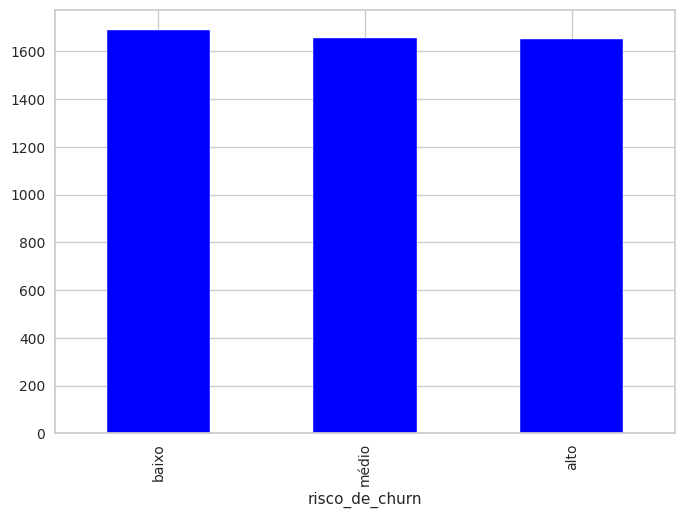

In [378]:
#as classes estão balanceadas?

df_socio['risco_de_churn'].value_counts().plot(kind='bar', color='blue')

plt.show()

In [379]:
df_socio.describe()

,_id,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,quantos_membros,feedback_sobre_servicos,frequencia_de_compra_de_produtos
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,43.770754,37.954991,18.378076,4.506901,248.821164,3.999000,4.985197,5.608722
std,1443.231328,25.126241,21.265076,11.062298,2.873953,143.803688,2.007339,3.133961,4.279236
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1250.500000,22.000000,20.000000,9.000000,2.000000,126.000000,2.000000,2.000000,2.000000
50%,2500.000000,43.000000,38.000000,18.000000,5.000000,247.000000,4.000000,5.000000,5.000000
75%,3749.500000,65.000000,57.000000,28.000000,7.000000,373.000000,6.000000,8.000000,8.000000
max,4999.000000,87.000000,86.000000,37.000000,9.000000,500.000000,7.000000,10.000000,20.000000


In [380]:
missing_percentage = (df_socio.isnull().sum() / len(df_socio)) * 100
missing_df = pd.DataFrame({'Column': df_socio.columns, 'Missing Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)
missing_df

,Column,Missing Percentage
_id,_id,0.0
tempo_de_assinatura,tempo_de_assinatura,0.0
historico_de_presenca_nos_jogos,historico_de_presenca_nos_jogos,0.0
historico_de_socio,historico_de_socio,0.0
numero_de_desistencias_no_periodo,numero_de_desistencias_no_periodo,0.0
historico_de_preco_nos_planos,historico_de_preco_nos_planos,0.0
tipo_de_plano,tipo_de_plano,0.0
quantos_membros,quantos_membros,0.0
planos_com_ingresso_incluso,planos_com_ingresso_incluso,0.0
estado_civil,estado_civil,0.0


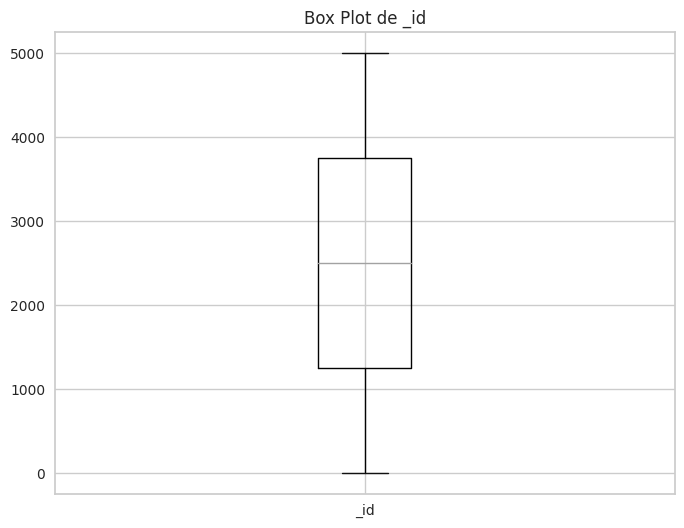

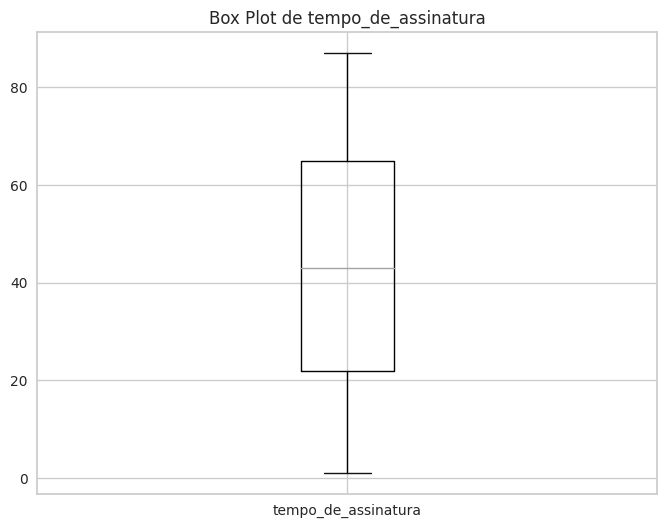

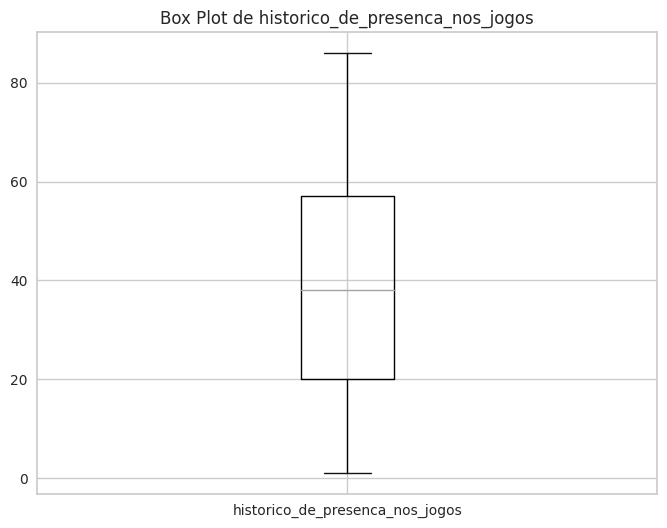

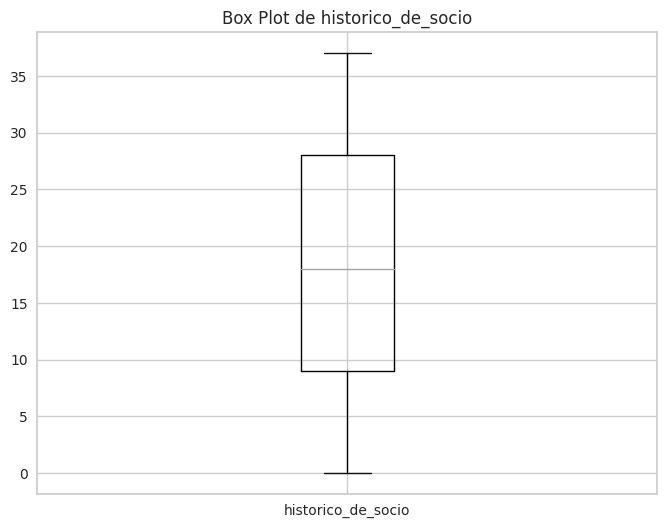

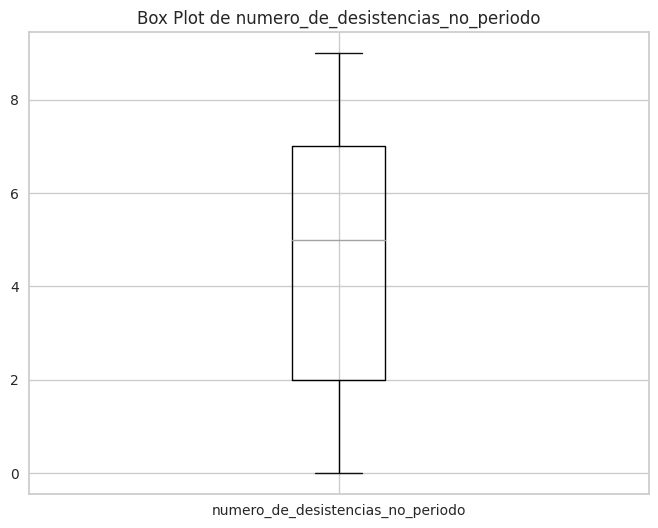

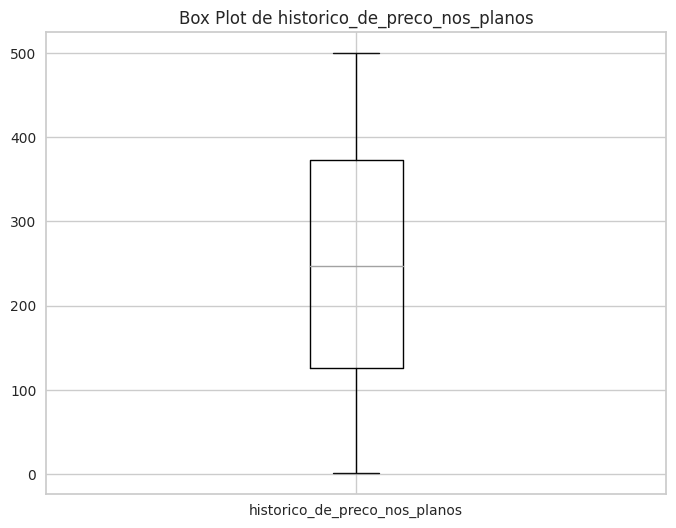

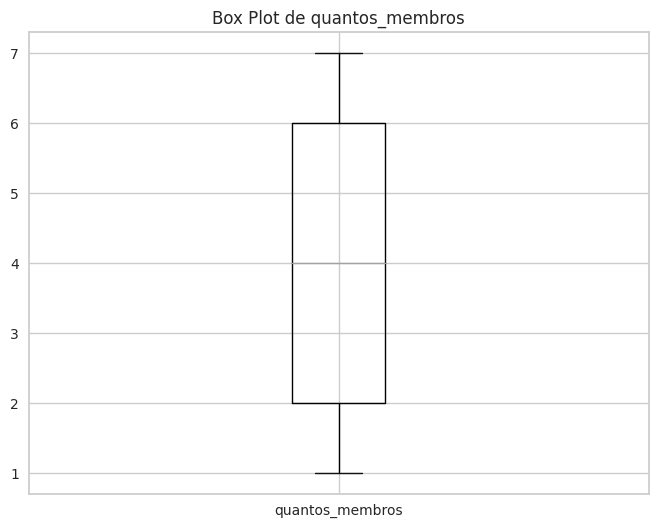

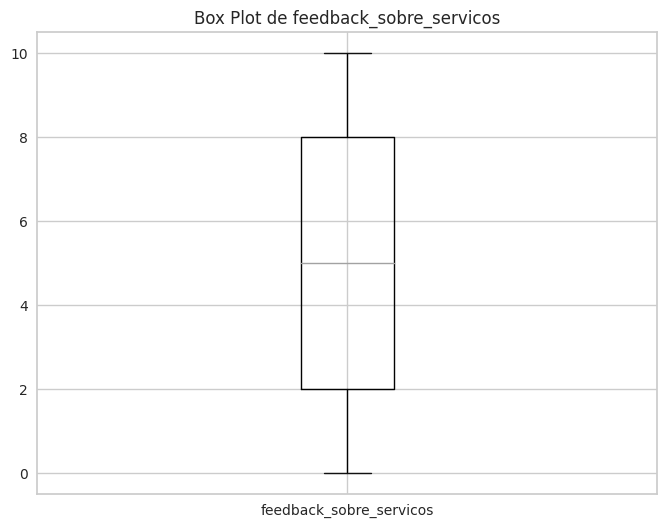

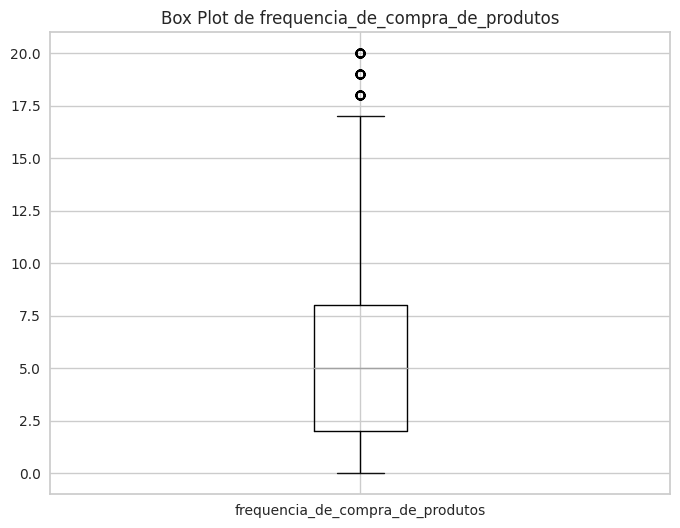

In [381]:
colunas_numericas = df_socio.select_dtypes(include=['float64', 'int64']).columns

# Criar box plots para cada coluna numérica
for coluna in colunas_numericas:
    plt.figure(figsize=(8, 6))
    df_socio.boxplot(column=coluna)
    plt.title(f'Box Plot de {coluna}')
    plt.show()

In [382]:
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder

scaler = RobustScaler()
df_socio[colunas_numericas] = scaler.fit_transform(df_socio[colunas_numericas])
df_socio

,_id,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,tipo_de_plano,quantos_membros,planos_com_ingresso_incluso,estado_civil,risco_de_churn,feedback_sobre_servicos,frequencia_de_compra_de_produtos
0,-1.000000,-0.093023,0.891892,-0.368421,-0.2,-0.457490,familiar,0.00,sim,solteiro,médio,-0.333333,-0.833333
1,-0.999600,0.209302,0.594595,-0.894737,-0.8,-0.113360,familiar,-0.25,sim,divorciado,alto,-0.666667,-0.333333
2,-0.999200,-0.325581,-0.486486,-0.736842,-0.4,0.761134,individual,0.00,nao,casado,alto,-0.166667,0.000000
3,-0.998800,-0.651163,1.189189,-0.526316,-0.8,0.562753,individual,0.00,sim,solteiro,baixo,-0.500000,0.833333
4,-0.998399,0.000000,1.297297,-0.789474,-0.4,-0.032389,individual,-0.75,sim,casado,alto,0.500000,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.998399,-0.418605,0.459459,0.684211,-1.0,0.064777,individual,0.25,sim,divorciado,médio,-0.166667,-0.333333
4995,0.998800,0.697674,0.486486,-0.684211,0.2,-0.145749,individual,0.00,nao,solteiro,baixo,0.833333,1.500000
4996,0.999200,-0.976744,0.108108,0.263158,-0.4,-0.514170,familiar,-0.25,sim,solteiro,alto,0.666667,-0.333333
4997,0.999600,-0.930233,0.081081,-0.105263,-0.2,-0.740891,individual,0.00,sim,divorciado,baixo,-0.666667,0.000000


In [383]:
df_socio.dtypes

_id                                  float64
tempo_de_assinatura                  float64
historico_de_presenca_nos_jogos      float64
historico_de_socio                   float64
numero_de_desistencias_no_periodo    float64
historico_de_preco_nos_planos        float64
tipo_de_plano                         object
quantos_membros                      float64
planos_com_ingresso_incluso           object
estado_civil                          object
risco_de_churn                        object
feedback_sobre_servicos              float64
frequencia_de_compra_de_produtos     float64
dtype: object

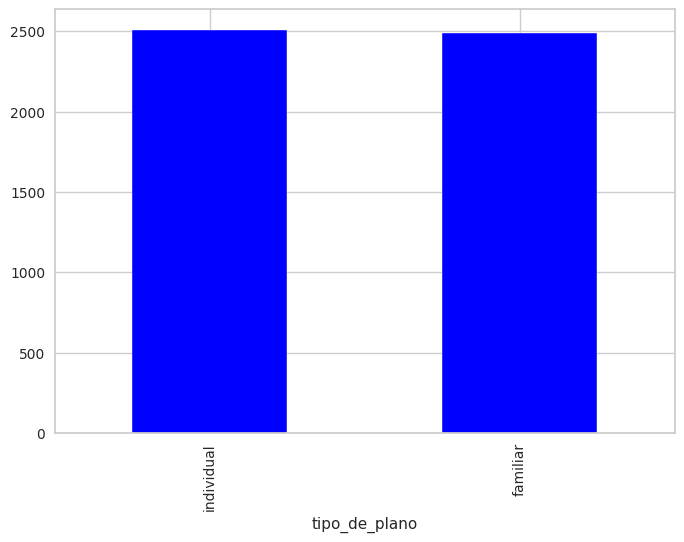

In [384]:
df_socio['tipo_de_plano'].value_counts().plot(kind='bar', color='blue')

plt.show()

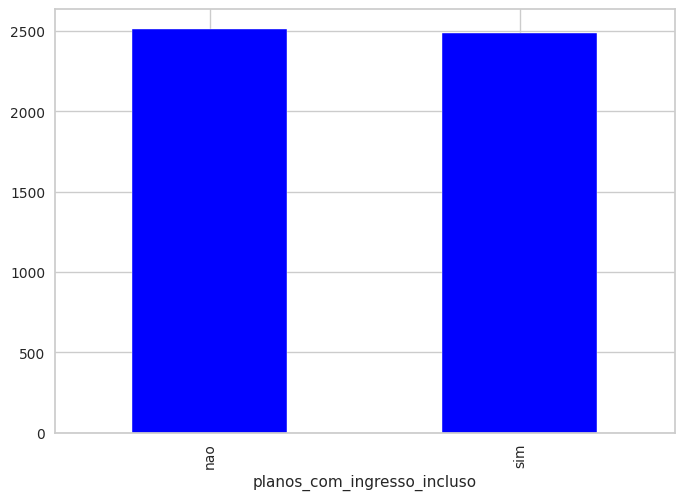

In [385]:
df_socio['planos_com_ingresso_incluso'].value_counts().plot(kind='bar', color='blue')

plt.show()

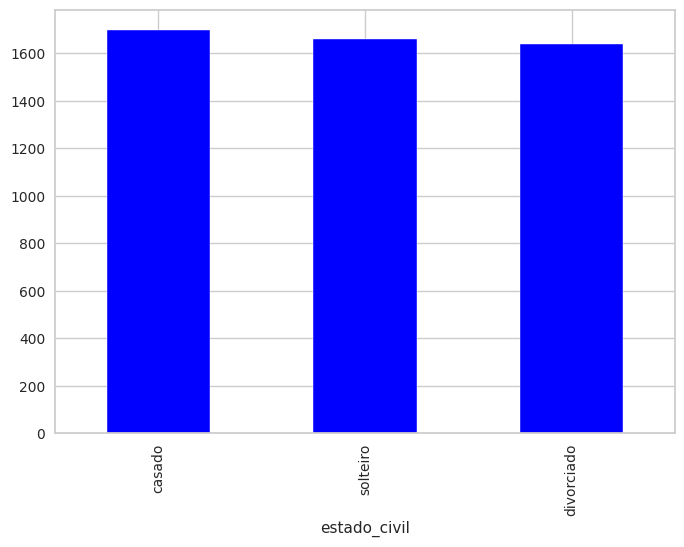

In [386]:
df_socio['estado_civil'].value_counts().plot(kind='bar', color='blue')

plt.show()

In [387]:
colunas_categoricas = df_socio.select_dtypes(include=['object']).columns

In [388]:
colunas_categoricas=colunas_categoricas.drop('risco_de_churn')

In [389]:
colunas_categoricas

Index(['tipo_de_plano', 'planos_com_ingresso_incluso', 'estado_civil'], dtype='object')

In [390]:
encoder = OneHotEncoder()
dados_encoded = encoder.fit_transform(df_socio[colunas_categoricas])
df_encoded = pd.DataFrame(dados_encoded.toarray(), columns=encoder.get_feature_names_out(colunas_categoricas))
df_socio = pd.concat([df_socio, df_encoded], axis=1).drop(colunas_categoricas, axis=1)


In [391]:
df_socio

,_id,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,quantos_membros,risco_de_churn,feedback_sobre_servicos,frequencia_de_compra_de_produtos,tipo_de_plano_familiar,tipo_de_plano_individual,planos_com_ingresso_incluso_nao,planos_com_ingresso_incluso_sim,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro
0,-1.000000,-0.093023,0.891892,-0.368421,-0.2,-0.457490,0.00,médio,-0.333333,-0.833333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.999600,0.209302,0.594595,-0.894737,-0.8,-0.113360,-0.25,alto,-0.666667,-0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.999200,-0.325581,-0.486486,-0.736842,-0.4,0.761134,0.00,alto,-0.166667,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,-0.998800,-0.651163,1.189189,-0.526316,-0.8,0.562753,0.00,baixo,-0.500000,0.833333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,-0.998399,0.000000,1.297297,-0.789474,-0.4,-0.032389,-0.75,alto,0.500000,-0.500000,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.998399,-0.418605,0.459459,0.684211,-1.0,0.064777,0.25,médio,-0.166667,-0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4995,0.998800,0.697674,0.486486,-0.684211,0.2,-0.145749,0.00,baixo,0.833333,1.500000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4996,0.999200,-0.976744,0.108108,0.263158,-0.4,-0.514170,-0.25,alto,0.666667,-0.333333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4997,0.999600,-0.930233,0.081081,-0.105263,-0.2,-0.740891,0.00,baixo,-0.666667,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [392]:
df_socio.drop('_id', axis=1,inplace=True)

In [393]:
df_socio.head()

,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,quantos_membros,risco_de_churn,feedback_sobre_servicos,frequencia_de_compra_de_produtos,tipo_de_plano_familiar,tipo_de_plano_individual,planos_com_ingresso_incluso_nao,planos_com_ingresso_incluso_sim,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro
0,-0.093023,0.891892,-0.368421,-0.2,-0.457490,0.00,médio,-0.333333,-0.833333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.209302,0.594595,-0.894737,-0.8,-0.113360,-0.25,alto,-0.666667,-0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.325581,-0.486486,-0.736842,-0.4,0.761134,0.00,alto,-0.166667,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,-0.651163,1.189189,-0.526316,-0.8,0.562753,0.00,baixo,-0.500000,0.833333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.000000,1.297297,-0.789474,-0.4,-0.032389,-0.75,alto,0.500000,-0.500000,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [394]:
df_socio.columns

Index(['tempo_de_assinatura', 'historico_de_presenca_nos_jogos',
       'historico_de_socio', 'numero_de_desistencias_no_periodo',
       'historico_de_preco_nos_planos', 'quantos_membros', 'risco_de_churn',
       'feedback_sobre_servicos', 'frequencia_de_compra_de_produtos',
       'tipo_de_plano_familiar', 'tipo_de_plano_individual',
       'planos_com_ingresso_incluso_nao', 'planos_com_ingresso_incluso_sim',
       'estado_civil_casado', 'estado_civil_divorciado',
       'estado_civil_solteiro'],
      dtype='object')

In [395]:
df_socio.head()

,tempo_de_assinatura,historico_de_presenca_nos_jogos,historico_de_socio,numero_de_desistencias_no_periodo,historico_de_preco_nos_planos,quantos_membros,risco_de_churn,feedback_sobre_servicos,frequencia_de_compra_de_produtos,tipo_de_plano_familiar,tipo_de_plano_individual,planos_com_ingresso_incluso_nao,planos_com_ingresso_incluso_sim,estado_civil_casado,estado_civil_divorciado,estado_civil_solteiro
0,-0.093023,0.891892,-0.368421,-0.2,-0.457490,0.00,médio,-0.333333,-0.833333,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.209302,0.594595,-0.894737,-0.8,-0.113360,-0.25,alto,-0.666667,-0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.325581,-0.486486,-0.736842,-0.4,0.761134,0.00,alto,-0.166667,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,-0.651163,1.189189,-0.526316,-0.8,0.562753,0.00,baixo,-0.500000,0.833333,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.000000,1.297297,-0.789474,-0.4,-0.032389,-0.75,alto,0.500000,-0.500000,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [396]:
X = df_socio.drop('risco_de_churn', axis=1)
y=df_socio['risco_de_churn']

In [397]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
y_encoded = label_encoder.fit_transform(y)

# Mapear as classes para os rótulos originais
class_mapping = {class_label: original_label for original_label, class_label in zip(label_encoder.classes_, range(len(label_encoder.classes_)))}
print("Mapeamento de classes:")
print(class_mapping)

Mapeamento de classes:
{0: 'alto', 1: 'baixo', 2: 'médio'}


In [398]:
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20)

In [399]:
def model_evaluation(y_pred,y_test,y_train,x_train,x_test,model):
    '''
    This function aims to show the main model evaluation metrics (accuracy, recall, precision and f1), as well as the confusion matrix.
    '''
    # Accuracy: The overall percentage of correct predictions made by the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acuracy: {accuracy:.4f}. (The overall percentage of correct predictions made by the model)')

    # Precision: The ratio of correct positive predictions to the total positive predictions made by the model
    precision = precision_score(y_test, y_pred,average='micro')
    print(f'Precision: {precision:.4f}(The ratio of correct positive predictions to the total positive predictions made by the model)')

    # Recall: The ratio of correct positive predictions to the total actual positive cases
    recall = recall_score(y_test, y_pred,average='micro')
    print(f'Recall: {recall:.4f} (The ratio of correct positive predictions to the total actual positive cases.)')

    # F1-score: A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes
    f1 = f1_score(y_test, y_pred,average='micro')
    print(f'F1-score: {f1:.4f} ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)')

    #Confusion metrix
    cm = confusion_matrix(model,x_train,y_train,x_test,y_test)
    cm.show;

### Logistic regression

Acuracy: 0.3460. (The overall percentage of correct predictions made by the model)


Precision: 0.3460(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.3460 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.3460 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


/home/giovane/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


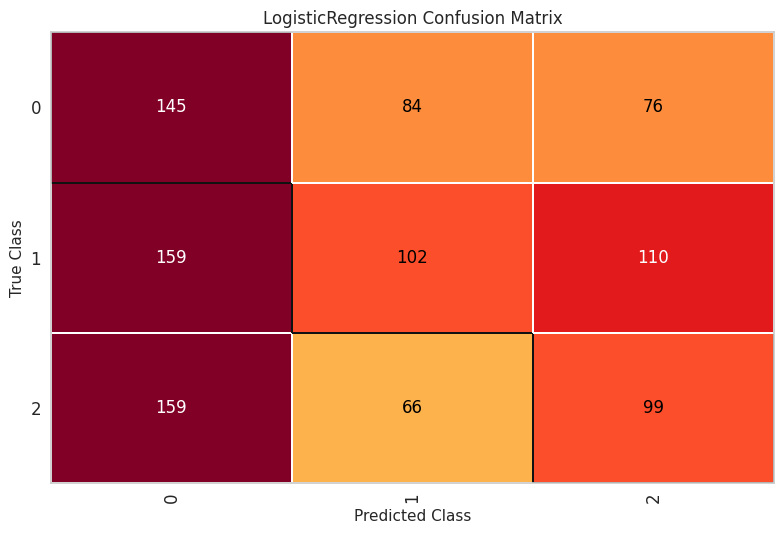

In [400]:
lg= LogisticRegression()
lg.fit(x_train, y_train)

# Making predictions
y_pred = lg.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,lg)

### Xgboost

In [401]:
y_train

array([1, 1, 1, ..., 1, 2, 0])

Acuracy: 0.3630. (The overall percentage of correct predictions made by the model)
Precision: 0.3630(The ratio of correct positive predictions to the total positive predictions made by the model)
Recall: 0.3630 (The ratio of correct positive predictions to the total actual positive cases.)
F1-score: 0.3630 ( A metric that combines precision and recall into a single measure, useful when there is an imbalance between classes)


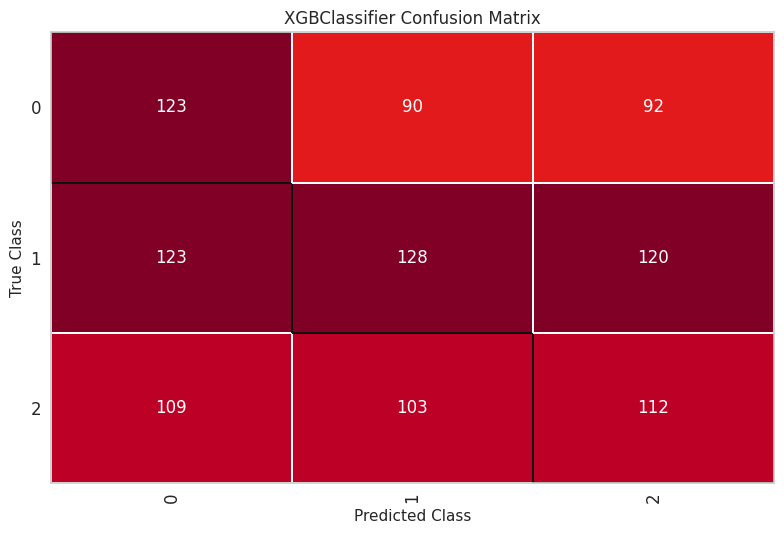

In [402]:
# Creating and fitting the XGBoost Classifier model
model_xgb = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Training the model
model_xgb.fit(x_train, y_train)

# Making predictions
y_pred = model_xgb.predict(x_test)

# Evaluating the model
model_evaluation(y_pred,y_test,y_train,x_train,x_test,model_xgb)

### TESTE com PCA

In [403]:
# df = pd.read_csv('../data/socio_torcedor.csv')

In [404]:
# X = df.drop(['risco_de_churn','_id','tipo_de_plano','planos_com_ingresso_incluso','estado_civil'], axis=1)
# y=df['risco_de_churn']

In [405]:
# X.dtypes

In [406]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X = pd.DataFrame(scaler.transform(X), columns=X.columns)
# X

In [407]:
# sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [408]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [409]:
# pca = PCA(n_components=6)
# X_train_pca = pca.fit_transform(x_train)
# X_test_pca = pca.transform(x_test)

In [410]:
# pca.explained_variance_ratio_

In [411]:
# random_forest_pca = RandomForestClassifier(n_estimators=40, random_state=0, criterion = 'entropy')
# random_forest_pca.fit(X_train_pca, y_train)
# previsoes = random_forest_pca.predict(X_test_pca)
# accuracy_score(y_test, previsoes)


In [412]:
# Apply Principal Component Analysis (PCA) to reduce dimensionality
pca = PCA()
X_pca = pca.fit_transform(X)

# Retrieve the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to store principal component, explained variance ratio, and corresponding feature names
df_var_exp = pd.DataFrame({'Principal Component': range(1, len(explained_variance_ratio) + 1),
                            'Explained Variance Ratio': explained_variance_ratio,
                            'Feature': X.columns})

# Create a bar plot to visualize the explained variance of each principal component with feature names
plt.figure(figsize=(12, 8))
bars = plt.bar(df_var_exp['Principal Component'], df_var_exp['Explained Variance Ratio'], color='blue', alpha=0.7)

# Add feature names as labels to the bars
for bar, feature in zip(bars, df_var_exp['Feature']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, feature, ha='center', va='bottom', rotation=45, fontsize=8)

# Set plot labels and title
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Principal Components with Feature Names')
plt.show()